# Session 2: Neural Networks in Python (9/27/22) Homework

epoch 0, loss 2.21921, accuracy 0.52
epoch 1, loss 2.11208, accuracy 0.67
epoch 2, loss 1.97320, accuracy 0.72
epoch 3, loss 1.81167, accuracy 0.74
epoch 4, loss 1.61651, accuracy 0.75
epoch 5, loss 1.42195, accuracy 0.77
epoch 6, loss 1.25089, accuracy 0.79
epoch 7, loss 1.11093, accuracy 0.80
epoch 8, loss 0.99711, accuracy 0.81
epoch 9, loss 0.90533, accuracy 0.82
epoch 10, loss 0.83196, accuracy 0.83
epoch 11, loss 0.77964, accuracy 0.84
epoch 12, loss 0.72242, accuracy 0.84
epoch 13, loss 0.68961, accuracy 0.85
epoch 14, loss 0.65124, accuracy 0.85
epoch 15, loss 0.60919, accuracy 0.86
epoch 16, loss 0.59159, accuracy 0.86
epoch 17, loss 0.57598, accuracy 0.86
epoch 18, loss 0.54138, accuracy 0.87
epoch 19, loss 0.53341, accuracy 0.87


0.8680166666666667

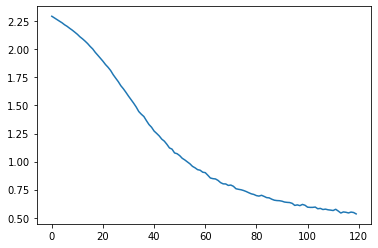

In [3]:
import tensorflow as tf

import numpy
import matplotlib.pyplot as plt

from fc_net import TwoLayerNet

# repeating the data prep from the previous notebook
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype(numpy.float32)
x_test  = x_test.astype(numpy.float32)

x_train /= 255.
x_test  /= 255.

#print(x_train.shape)
x_train = x_train.reshape(x_train.shape[0], numpy.prod(x_train[0,:,:].shape))
x_test = x_test.reshape(x_test.shape[0], numpy.prod(x_test[0,:,:].shape))

#print(x_train.shape)
y_train = y_train.astype(numpy.int32)
y_test  = y_test.astype(numpy.int32)

#print()
#print('MNIST data loaded: train:',len(x_train),'test:',len(x_test))
#print('X_train:', x_train.shape)
#print('y_train:', y_train.shape)

# one-hot encoding:
nb_classes = 10
y_train_onehot = tf.keras.utils.to_categorical(y_train, nb_classes)
y_test_onehot = tf.keras.utils.to_categorical(y_test, nb_classes)

num_features = x_train.shape[1] # this is the number of pixels
# The weights are initialized from a normal distribution with standard deviation weight_scale
model = TwoLayerNet(input_dim=num_features, hidden_dim=450, num_classes=nb_classes, weight_scale=.02)

# here you can take a look if you want at the initial loss from an untrained network
loss, gradients = model.loss(x_train, y_train_onehot)

# a simple implementation of stochastic gradient descent
def sgd(model, gradients, learning_rate):
    for p, w in model.params.items():
        dw = gradients[p]
        new_weights = w - learning_rate * dw
        model.params[p] = new_weights
    return model

# one training step
def learn(model, x_train, y_train_onehot, learning_rate):
    loss, gradients = model.loss(x_train, y_train_onehot)
    model = sgd(model, gradients, learning_rate)
    return loss, model

def accuracy(model, x, true_values):
    scores = model.loss(x)
    predictions = numpy.argmax(scores, axis=1)
    N = predictions.shape[0]
    acc = (true_values == predictions).sum() / N
    return acc

# Here's an example training loop using this two-layer model. Can you do better? 
learning_rate = 0.1  
num_examples = x_train.shape[0]
batch_size = 10000
num_batches = int(num_examples / batch_size)
num_epochs = 20
losses = numpy.zeros(num_batches*num_epochs,)
indices = numpy.arange(num_examples)

i = 0
for epoch in range(0, num_epochs):
    # in each epoch, we loop over all of the training examples
    for step in range(0, num_batches):
        # grabbing the next batch
        offset = step * batch_size
        batch_range = range(offset, offset+batch_size)
        x_train_batch = x_train[batch_range, :]
        y_train_batch = y_train_onehot[batch_range,:]
        
        # feed the next batch in to do one sgd step
        loss, model = learn(model, x_train_batch, y_train_batch, learning_rate)
        losses[i] = loss
        i += 1

    acc = accuracy(model, x_train, y_train)
    print("epoch %d, loss %.5f, accuracy %.2f" % (epoch, loss, acc))
    
    # reshuffle the data so that we get a new set of batches
    numpy.random.shuffle(indices)
    x_train = x_train[indices,:]
    y_train = y_train[indices] # keep this shuffled the same way for use in accuracy calculation
    y_train_onehot = y_train_onehot[indices,:]
plt.plot(losses)

accuracy(model, x_train, y_train)